<a href="https://colab.research.google.com/github/daeyeong8855/Image-Manipulation-and-Dataset-Construction/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%B2%98%EB%A6%AC_%EA%B8%B0%EC%B4%88%EA%B3%BC%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 이미지 타입, 크기 확인
* 주피터 등에서 cv2.imshow를 직접 사용 불가
* matplotlib 등을 사용

In [5]:
import cv2
import os

os.makedirs('./data', exist_ok=True)
image_path = './data/cat.png'

image = cv2.imread(image_path)

type(image)


height, width, channel = image.shape

## 이미지 확인
* 주피터 등에서 cv2.imshow를 직접 사용 불가
* matplotlib 등을 사용

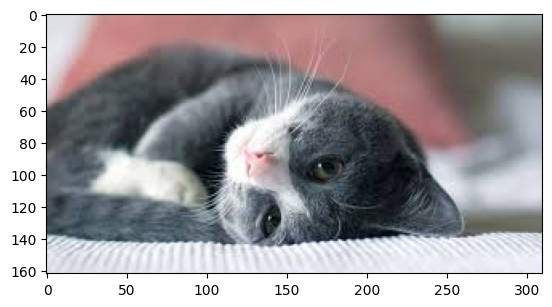

In [6]:
import cv2
import matplotlib.pyplot as plt

image_path = './data/cat.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

## 이미지 크기 변경

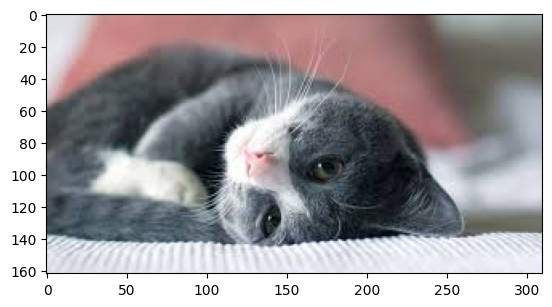

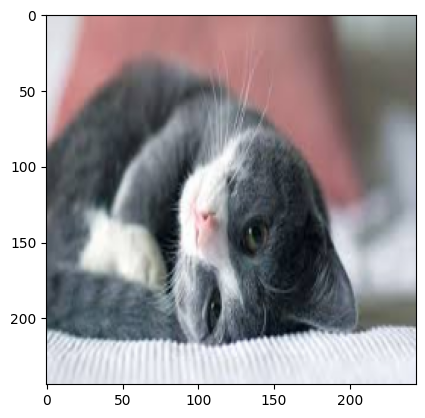

In [10]:
import cv2
import matplotlib.pyplot as plt

image_resize = cv2.resize(image, (244,244))

plt.imshow(image)
plt.show()
plt.imshow(image_resize)
plt.show()

#이미지 저장

In [13]:
# 그냥 저장하면 색이 이상하게 나옴
image_resize = cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB)
cv2.imwrite("./data/resize_image.png", image_resize)


True

## 이미지 자르기
* 이미지 크롭 [start : end : stop]
* 좌표 [y1:y2, x1:x2]

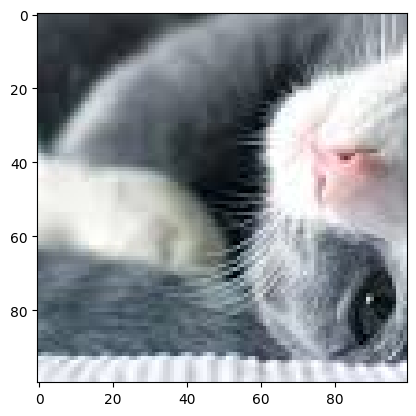

In [31]:
# 이미지 크롭 [start : end : stop]
image_cropped = image[10:,:200]
plt.imshow(image_cropped)
plt.show


# 좌표
x1, y1 = 50, 50
x2, y2 = 150, 150
image_cart = image[y1:y2, x1:x2]
plt.imshow(image_cart)
plt.show()

## 블러

### 일반 블러

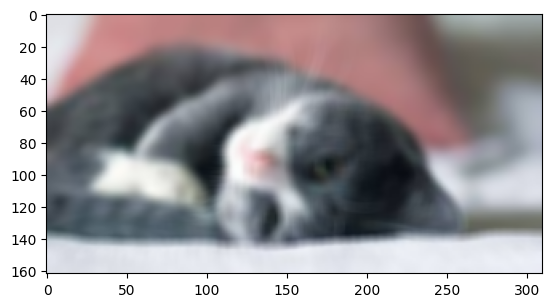

In [32]:
img_blur = cv2.blur(image, (7,7))

plt.imshow(img_blur)
plt.show()

### 커스텀 블러
cv2.filter2D

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


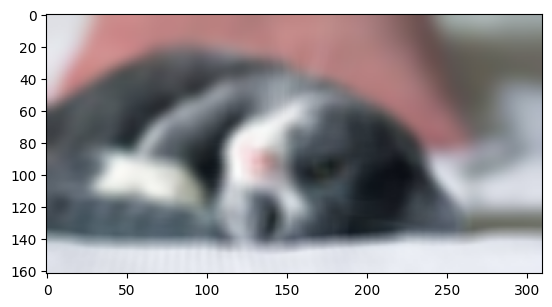

In [50]:
import numpy as np

kernel = np.ones((10,10))/100.0 # 전부 더하면 1이 되도록 정규화, 값이 작을수록 어두움
print(kernel)

image_kernel = cv2.filter2D(image,-1,kernel)

plt.imshow(image_kernel)
plt.show()

### 가우시안블러
cv2 GaussianBlur(이미지, (커널), sd)

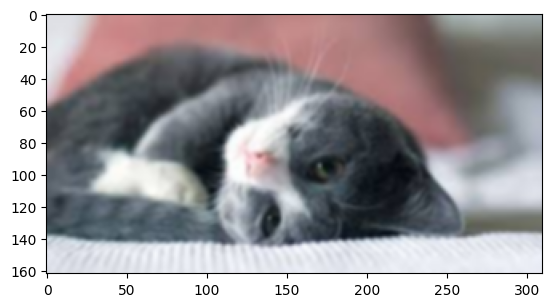

In [54]:
img_g = cv2.GaussianBlur(image, (5,5),0) # 0은 표준편차

plt.imshow(img_g)
plt.show()

## 선명한 이미지

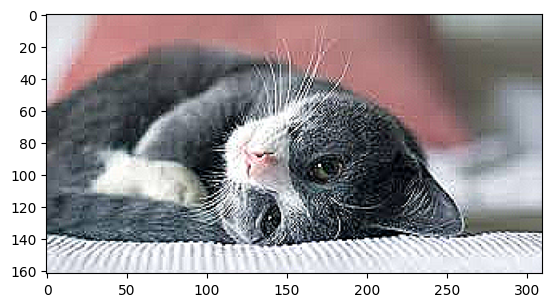

In [56]:
kernel_ = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]
                   ])

image_sharp = cv2.filter2D(image,-1,kernel_)

plt.imshow(image_sharp)
plt.show()

## 대비
### 흑백대비
* equalizeHist
* 흑백에만 가능
히스토그램 평활화

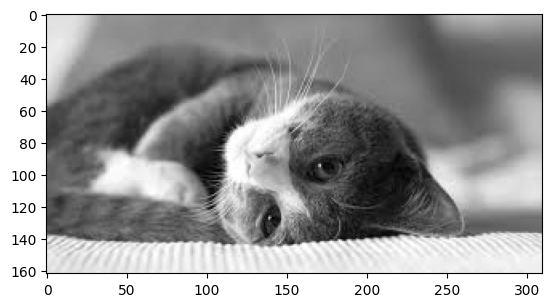

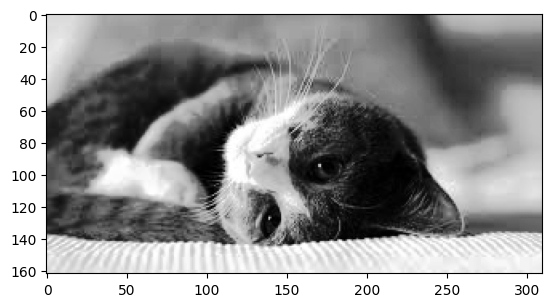

In [60]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_enhanced = cv2.equalizeHist(image_gray)

plt.imshow(image_gray, 'gray')
plt.show()
plt.imshow(img_enhanced, 'gray')
plt.show()

### 컬러 대비
* yuv 타입으로만 컬러대비가 가능
* yuv 로 변경 -> 평활화 -> RGB로 변경

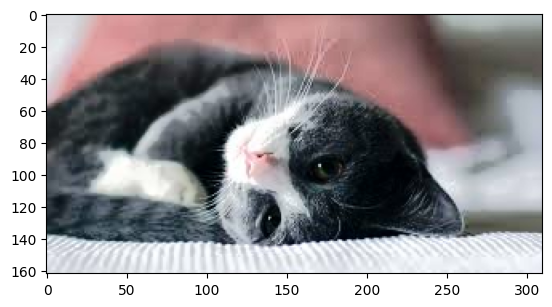

In [72]:
# RGB to YUV (해당 코드는 상위 코드에서 이미 RGB로 설정됨)
image_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)

# 히스토그램 평활화 적용
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

# YUV to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

plt.imshow(image_rgb)
plt.show()

## 이미지 이진화
* 이진화는 흑백에만 가능

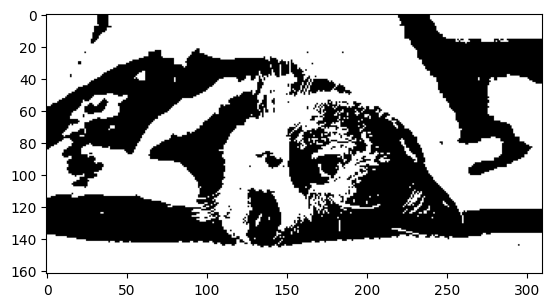

In [79]:
# 흑백화
image_gray_01 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 이진화 (_INV는 반전을 의미)
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(
    image_gray_01,
    max_output_value,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    neighborhood_size,
    subtract_from_mean
)

plt.imshow(image_binarized, 'gray')
plt.show()

## 이미지 회전
* rotate : 각도

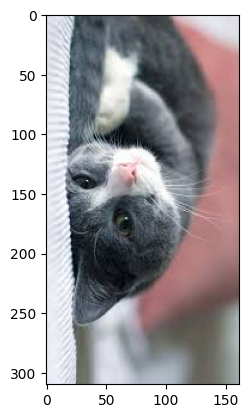

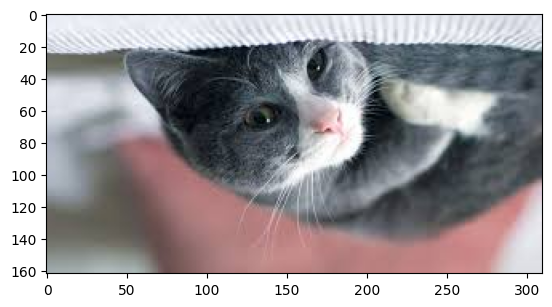

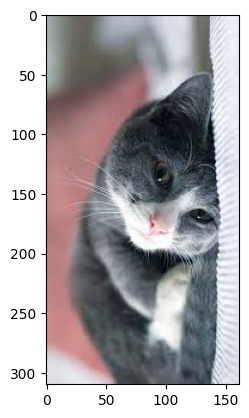

In [80]:
# 이미지 회전
image_90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
image_180 = cv2.rotate(image, cv2.ROTATE_180)
image_270 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.imshow(image_90)
plt.show()
plt.imshow(image_180)
plt.show()
plt.imshow(image_270)
plt.show()

### 좌우, 상하 반전
* 1은 좌우 반전/ 0은 상하 반전
* cv2.flip

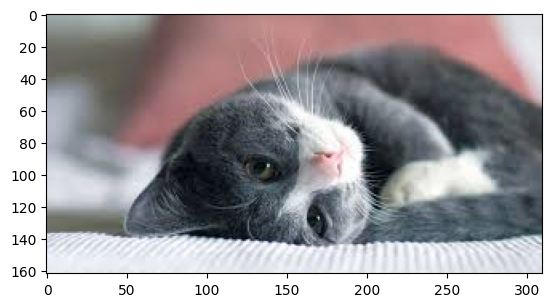

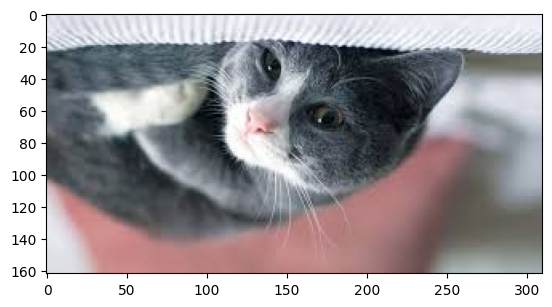

In [81]:
# 1은 좌우 반전/ 0은 상하 반전
dst_1 = cv2.flip(image, 1)
dst_2 = cv2.flip(image, 0)

plt.imshow(dst_1)
plt.show()
plt.imshow(dst_2)
plt.show()

## 배경 제거
* cv2.grabCut

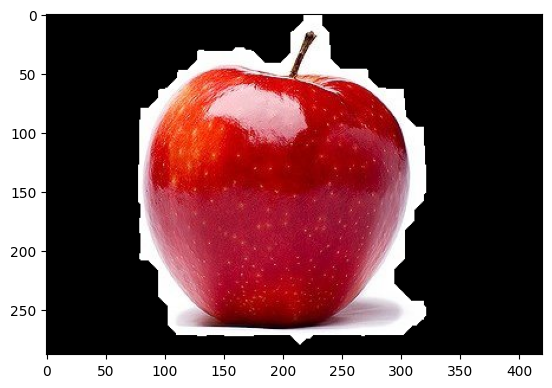

In [117]:
apple_path = './data/apple.jpeg'
apple = cv2.imread(image_path)
apple = cv2.cvtColor(apple,cv2.COLOR_BGR2RGB)
rectangle = (0,0,399,1000) # x,y,넓이,너비

# 초기 마스크 생성
mask = np.zeros(apple.shape[:2], np.uint8)

#grabcut에 사용할 임시 배열 생성
bgModel = np.zeros((1,65), np.float64)
fgModel = np.zeros((1,65), np.float64)


#grabCut 실행
cv2.grabCut(apple, mask, rectangle, bgModel, fgModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
apple_rgb_nobg = image * mask2[:,:, np.newaxis]
plt.imshow(apple_rgb_nobg)
plt.show()

## 경계선 감지
* cv2.Canny()
* 그래디언트 임계값 사이의 저점과 고점을 나타내는 두 매개변수 필요

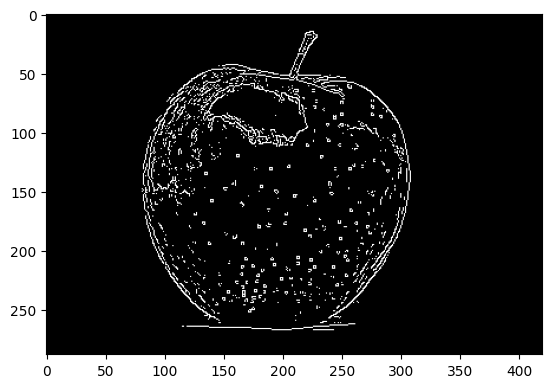

In [93]:
apple_gray = cv2.cvtColor(apple, cv2.IMREAD_GRAYSCALE)
# 1.픽셀강도의 중간값 계산
median_intensity = np.median(image)

# 2. 중간 픽셀 강도에서 위아래 1 표준편차 떨어긴 값을 임계값으로 지정
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
# 이 식에서는 0.33을 중간 강도에서 뺀 후, 0과의 최댓값을 취합니다. 이렇게 함으로써 중간 강도의 33% 아래 값을 하한값으로 설정합니다. 
# 하한값은 0이하가 되지 않음

upper_threshold = int(min(255, (1.0 - 0.33) * median_intensity))
# 이 식에서는 0.33을 중간 강도에서 뺀 후, 255과의 최소값을 취합니다. 이렇게 함으로써 중간 강도의 33% 아래 값을 상한값으로 설정합니다. 
# 상한값은 255를 넘지 않음

# 3. Canny edge 적용
apple_canny = cv2.Canny(apple, lower_threshold, upper_threshold)

plt.imshow(apple_canny, 'gray')
plt.show()

## 모서리 탐지

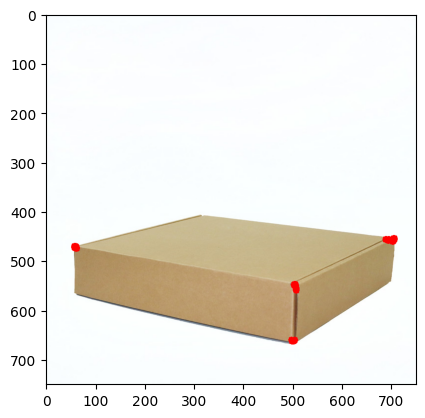

In [120]:
box = cv2.imread('./data/box.jpeg')

# 모서리 찾기
box_gray = cv2.imread('./data/box.jpeg', cv2.IMREAD_GRAYSCALE)
box_gray = np.float32(box_gray)

# 모서리 감지 매개변수 설정
block_size = 4
aperture = 29
free_parameter = 0.04

detector_response = cv2.cornerHarris(
    box_gray,
    block_size,
    aperture,
    free_parameter)

#모서리 표시를 부각시키기 위한 함수
detector_response = cv2.dilate(detector_response, None) 

# 임계값보다 큰 감지 결과만 남기고 나머지는 버리는 형태
threshold = 0.01
for i in range(detector_response.shape[0]) :
  for j in range(detector_response.shape[1]) :
    if detector_response[i,j] > threshold * detector_response.max() :
      cv2.circle(box, (j,i), radius=5, color=(0,0,255), thickness=-1)

box = cv2.cvtColor(box, cv2.COLOR_BGR2RGB)

plt.imshow(box)
plt.show()

## 머신러닝 특성 만들기

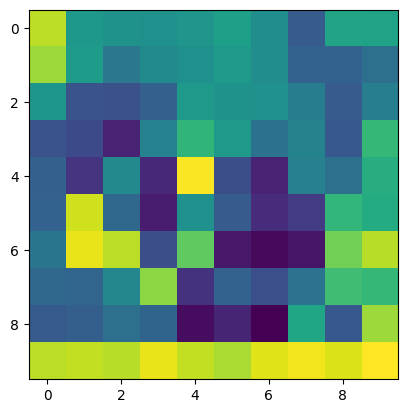

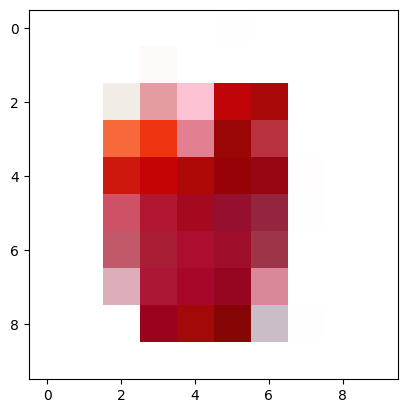

In [118]:
#10x10픽셀크기로 전환
box_10x10 = cv2.resize(box_gray, (10,10))
box_10x10.flatten()


plt.imshow(box_10x10)
plt.show()

apple_10x10_temp = cv2.resize(apple, (10,10))
apple_10x10_temp.flatten()

plt.imshow(apple_10x10_temp)
plt.show()

## 평균 색을 특성으로 인코딩

In [119]:
channels = cv2.mean(image)
print(channels)

(228.31011904761905, 183.62256944444445, 187.0489996693122, 0.0)
